In [1]:
# Import packages

import pandas as pd
import requests
from datetime import datetime, timedelta

In [2]:
# Using Alphavantage for fetching the news
# documentation : https://www.alphavantage.co/documentation/


In [3]:
# URL which considers symbol for specific stock, duration as from one day from the current date till current date, bydefault latest news, limit is top 20, and topic is technology
# time format : #YYYYMMDDTHHMM
#Basic url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey=API_KEY'
# limit not added but bydefault is 50 news

stock_symbol = "AAPL"
API_KEY = "I4OIMMPFUBLACCN6"
# Calculate the date range for the last two days until the current date
today = datetime.now().strftime("%Y%m%d")
two_days_ago = (datetime.now() - timedelta(days=2)).strftime("%Y%m%d")

url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={stock_symbol}&apikey={API_KEY}&topics=technology&time_from={two_days_ago}T0100&time_to={today}T2300&"

r = requests.get(url)
data = r.json()

In [4]:
# Convert the Python object into a DataFrame
df = pd.DataFrame(data)

In [5]:
df.head(5)

,items,sentiment_score_definition,relevance_score_definition,feed
0,34,x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...,"0 < x <= 1, with a higher score indicating hig...",{'title': 'Europe's Legislators To Back Artist...
1,34,x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...,"0 < x <= 1, with a higher score indicating hig...",{'title': 'Harnessing the Power of Long-Term T...
2,34,x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...,"0 < x <= 1, with a higher score indicating hig...",{'title': 'Global IPTV Market Report 2023: Gro...
3,34,x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...,"0 < x <= 1, with a higher score indicating hig...",{'title': 'Ray Dalio says AI technology both '...
4,34,x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...,"0 < x <= 1, with a higher score indicating hig...","{'title': 'Tesla's Surge Boosts EV ETFs', 'url..."


In [6]:
df.count()

items                         34
sentiment_score_definition    34
relevance_score_definition    34
feed                          34
dtype: int64

In [7]:
df["feed"][0]

{'title': "Europe's Legislators To Back Artists In Demanding Better Pay And Transparency From Spotify: Politico - Spotify Technology  ( NYSE:SPOT ) , Amazon.com  ( NASDAQ:AMZN ) ",
 'url': 'https://www.benzinga.com/news/23/06/32829228/europes-legislators-to-back-artists-in-demanding-better-pay-and-transparency-from-spotify-politico',
 'time_published': '20230613T050122',
 'authors': ['Benzinga Newsbot'],
 'summary': "In a move to better support European music creators and artists, a key lawmaker in the European Parliament's culture committee is pushing for greater transparency and fairer remuneration from music streaming platforms like Spotify Inc. SPOT, Politico reports.",
 'banner_image': 'https://cdn.benzinga.com/files/images/story/2023/Spotify_Photo_by_esthermm_on_Shutterstock_0.jpeg?width=1200&height=800&fit=crop',
 'source': 'Benzinga',
 'category_within_source': 'News',
 'source_domain': 'www.benzinga.com',
 'topics': [{'topic': 'Earnings', 'relevance_score': '0.158519'},
  {'to

In [8]:
print(df["feed"][0]["title"])
print(df["feed"][0]["time_published"])
print(df["feed"][0]["summary"])
'''
for i in range(df["feed"].count()):                            # To check the news published dates
  print(df["feed"][i]["time_published"])
'''

Europe's Legislators To Back Artists In Demanding Better Pay And Transparency From Spotify: Politico - Spotify Technology  ( NYSE:SPOT ) , Amazon.com  ( NASDAQ:AMZN ) 
20230613T050122
In a move to better support European music creators and artists, a key lawmaker in the European Parliament's culture committee is pushing for greater transparency and fairer remuneration from music streaming platforms like Spotify Inc. SPOT, Politico reports.


'\nfor i in range(df["feed"].count()):                            # To check the news published dates\n  print(df["feed"][i]["time_published"])\n'

In [9]:
# creating new article list where combining the title and summary together

articles_list = []

count = df["feed"].count()

for i in range(count):
  articles_list.append(df["feed"][i]["title"] + " : " + df["feed"][i]["summary"])

In [10]:
# Removing all the unnecessary brackets
import re

cleaned_articles_list = []

# Iterate over each text in the list
for text in articles_list:
    cleaned_text = re.sub(r'\([^)]*\)', '', text)
    cleaned_articles_list.append(cleaned_text)

'''
#Print the cleaned text data
for cleaned_text in cleaned_articles_list:
    print(cleaned_text)
'''
'''
# Removing all the punctuations from the list like fullstop or brackets

import re

cleaned_articles_list = []

# Define the regular expression pattern
pattern = r'[^\w\s]|\[|\]'

# Iterate over each text in the list
for text in articles_list:
    cleaned_text = re.sub(pattern, '', text)
    cleaned_articles_list.append(cleaned_text)

# Print the cleaned_articles_list
for cleaned_text in cleaned_articles_list:
    print(cleaned_text)
'''

"\n# Removing all the punctuations from the list like fullstop or brackets\n\nimport re\n\ncleaned_articles_list = []\n\n# Define the regular expression pattern\npattern = r'[^\\w\\s]|\\[|\\]'\n\n# Iterate over each text in the list\nfor text in articles_list:\n    cleaned_text = re.sub(pattern, '', text)\n    cleaned_articles_list.append(cleaned_text)\n\n# Print the cleaned_articles_list\nfor cleaned_text in cleaned_articles_list:\n    print(cleaned_text)\n"

In [11]:
# Start with Trnasformers

!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.7 MB/s eta 0:00:00


In [13]:
# Import Finbert model
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

# Move the model to the GPU
#GPU----------------------------
#model.to(device)
#inputs = inputs.to(device)
#------------------------------

In [14]:
# Add input cleaned_articles_list to finbert model
inputs = tokenizer(cleaned_articles_list, padding = True, truncation = True, return_tensors='pt')

# print(inputs)

In [15]:
# Generate the outputs

outputs = model(**inputs)

#outputs = model(**inputs.to(device))
print(outputs.logits.shape)

torch.Size([34, 3])


In [16]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)

#print(predictions)

In [17]:
# Print the results

import pandas as pd

positive = predictions[:, 0].tolist()
negative = predictions[:, 1].tolist()
neutral = predictions[:, 2].tolist()

table = {'Headline':cleaned_articles_list,
         "Positive":positive,
         "Negative":negative,
         "Neutral":neutral}

df = pd.DataFrame(table, columns = ["Headline", "Positive", "Negative", "Neutral"])

df.head(5)

,Headline,Positive,Negative,Neutral
0,Europe's Legislators To Back Artists In Demand...,0.696172,0.021137,0.282691
1,Harnessing the Power of Long-Term Technical An...,0.215605,0.013505,0.770890
2,Global IPTV Market Report 2023: Growth in Pref...,0.080689,0.012069,0.907243
3,Ray Dalio says AI technology both 'fabulous' a...,0.150918,0.017964,0.831118
4,Tesla's Surge Boosts EV ETFs : We discuss Tesl...,0.778177,0.010744,0.211079


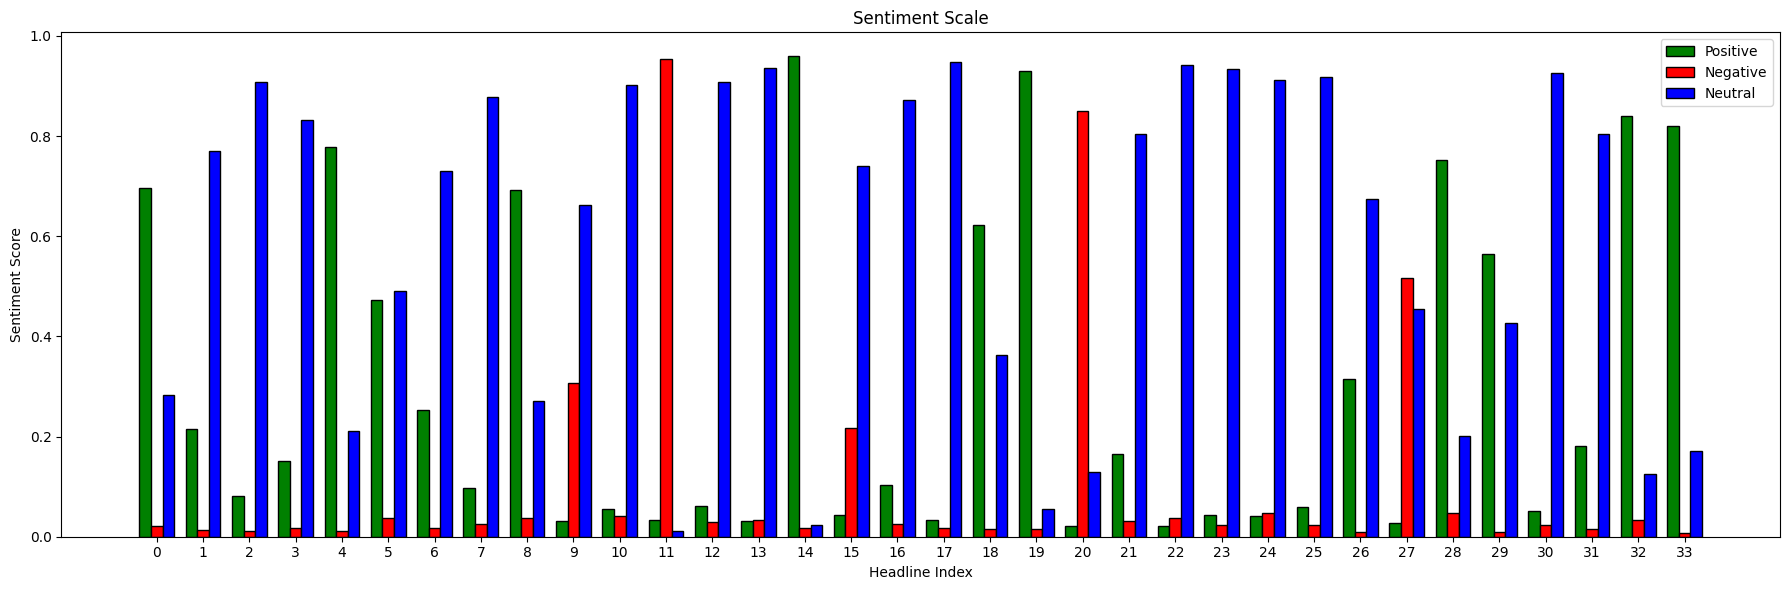

In [18]:
# Visualize the sentiment for each headline

import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data for plotting
headlines = df["Headline"]
positive_scores = df["Positive"]
negative_scores = df["Negative"]
neutral_scores = df["Neutral"]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = range(len(df))
r2 = [x + bar_width for x in r1]
r3 = [x + 2 * bar_width for x in r1]

# Plot the sentiment scale
plt.figure(figsize=(18, 6))  # Adjust the figure size
plt.bar(r1, positive_scores, color='g', width=bar_width, edgecolor='black', label='Positive')
plt.bar(r2, negative_scores, color='r', width=bar_width, edgecolor='black', label='Negative')
plt.bar(r3, neutral_scores, color='b', width=bar_width, edgecolor='black', label='Neutral')

# Add x-axis labels
plt.xlabel('Headline Index')
plt.xticks([r + bar_width for r in range(len(df))], r1)  # Use index values as labels

# Add y-axis label
plt.ylabel('Sentiment Score')

# Add chart title
plt.title('Sentiment Scale')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [19]:
# Add a new column for sentiment based on the highest value

df["Overall_Sentiment"] = df[["Positive", "Negative", "Neutral"]].idxmax(axis=1)
df["Overall_Sentiment"] = df["Overall_Sentiment"].apply(lambda x: x.capitalize())

df.head(5)

,Headline,Positive,Negative,Neutral,Overall_Sentiment
0,Europe's Legislators To Back Artists In Demand...,0.696172,0.021137,0.282691,Positive
1,Harnessing the Power of Long-Term Technical An...,0.215605,0.013505,0.770890,Neutral
2,Global IPTV Market Report 2023: Growth in Pref...,0.080689,0.012069,0.907243,Neutral
3,Ray Dalio says AI technology both 'fabulous' a...,0.150918,0.017964,0.831118,Neutral
4,Tesla's Surge Boosts EV ETFs : We discuss Tesl...,0.778177,0.010744,0.211079,Positive


In [20]:
# Calculate the count of positive, negative, and neutral values
sentiment_counts = df["Overall_Sentiment"].value_counts()

# Print the count of each sentiment
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
Neutral     21
Positive    10
Negative     3
Name: Overall_Sentiment, dtype: int64


In [21]:
# Calculate cumulative sentiment scores

df["Cumulative Sentiment"] = df["Positive"] - df["Negative"]

df.head(5)

,Headline,Positive,Negative,Neutral,Overall_Sentiment,Cumulative Sentiment
0,Europe's Legislators To Back Artists In Demand...,0.696172,0.021137,0.282691,Positive,0.675035
1,Harnessing the Power of Long-Term Technical An...,0.215605,0.013505,0.770890,Neutral,0.202099
2,Global IPTV Market Report 2023: Growth in Pref...,0.080689,0.012069,0.907243,Neutral,0.068620
3,Ray Dalio says AI technology both 'fabulous' a...,0.150918,0.017964,0.831118,Neutral,0.132954
4,Tesla's Surge Boosts EV ETFs : We discuss Tesl...,0.778177,0.010744,0.211079,Positive,0.767434


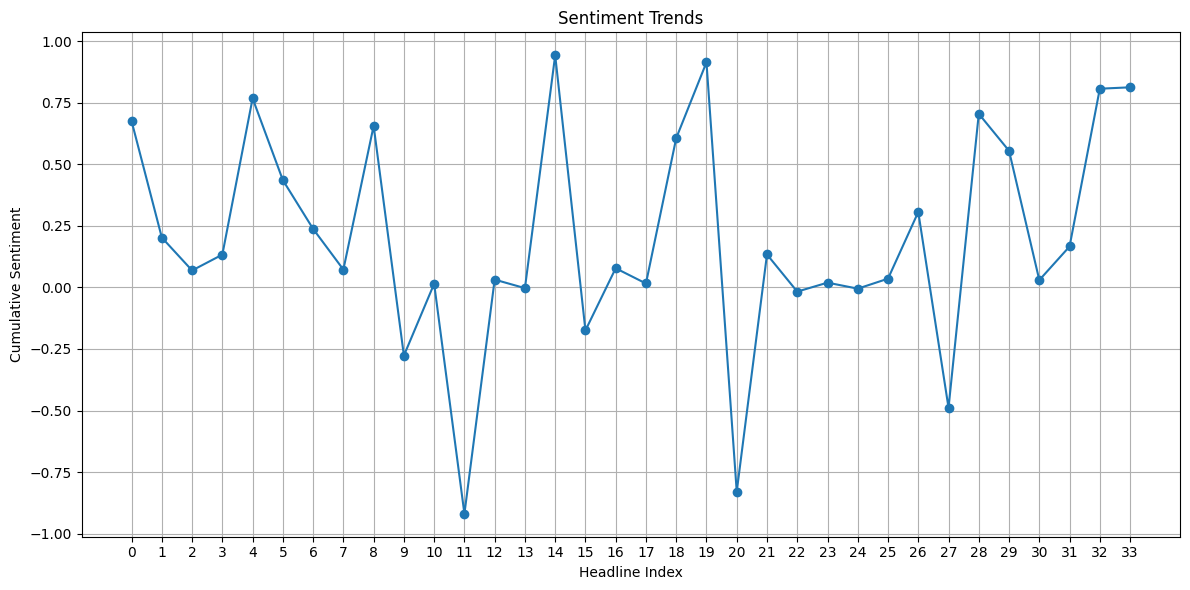

In [22]:
#Visualize based on Cumulative Sentiment score

# Prepare the data for plotting
dates = range(len(df))
sentiments = df["Cumulative Sentiment"]

# Plot the sentiment trends
plt.figure(figsize=(12, 6))  # Increase the width of the graph
plt.plot(dates, sentiments, marker="o")
plt.xlabel("Headline Index")
plt.ylabel("Cumulative Sentiment")
plt.title("Sentiment Trends")
plt.xticks(dates, range(len(df)))  # Label headlines as 0, 1, 2, ...
plt.grid(True)
plt.tight_layout()  # Adjust the layout to avoid overlapping labels
plt.show()


In [23]:
# Predicting the stock direction for next day

import pandas as pd


# Cumulative Sentiment score calculated already : df["Cumulative Sentiment"] = df["Positive"] - df["Negative"]

# Calculate the overall sentiment score
overall_sentiment_score = df["Cumulative Sentiment"].sum()

# Determine the overall sentiment direction
if overall_sentiment_score > 0:
    stock_direction = "Up"
elif overall_sentiment_score < 0:
    stock_direction = "Down"
else:
    stock_direction = "Neutral"

print("Overall Sentiment Score:", overall_sentiment_score)
print("Predicted Stock Direction for Next Day:", stock_direction)

Overall Sentiment Score: 6.700965234078467
Predicted Stock Direction for Next Day: Up
